In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reads in all sheets in Riket

## A)

In [3]:
df_country_english= pd.read_excel("../Data/riket2023_åk9_np.xlsx", sheet_name= "Engelska", skiprows= 8)
df_country_math= pd.read_excel("../Data/riket2023_åk9_np.xlsx", sheet_name= "Matematik", skiprows= 8)
df_country_swedish= pd.read_excel("../Data/riket2023_åk9_np.xlsx", sheet_name= "Svenska", skiprows= 8)
df_country_swedish2= pd.read_excel("../Data/riket2023_åk9_np.xlsx", sheet_name= "Svenska som andraspråk", skiprows= 8)
df_country_rapport= pd.read_excel("../Data/riket2023_åk9_np.xlsx", sheet_name= "Rapportbeskrivning och def.")
df_country_english

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [4]:
dfs= {
    "English": df_country_english,
    "Math": df_country_math,
    "Swedish": df_country_swedish,
    "Swedish2": df_country_swedish2,
    "Report": df_country_rapport
}
labels= [
    "",
    "",
    "(A-F)",
    "(A-F)",
    "(A-F)",
    "%(A-E)",
    "%(A-E)",
    "%(A-E)",
    "(Poäng)",
    "(Poäng)",
    "(Poäng)"
]
columns_copy= []

for subject in dfs:
    
    for column in dfs[subject].columns:
        dfs[subject][column] = dfs[subject][column].replace("..", 0)
        
        
    dfs[subject].columns= dfs[subject].columns.str.replace(" "[0:], "")
    dfs[subject]= dfs[subject].rename(columns= {"Typavhuvudman": "Huvudman"})
    columns_copy= dfs[subject].columns.tolist()
    columns_copy= [f"{col}{label}" for col, label in zip(dfs[subject].columns, labels)]
    
    dfs[subject].columns= columns_copy
    
df_country_english= dfs["English"]
df_country_math= dfs["Math"]
df_country_swedish= dfs["Swedish"]
df_country_swedish2= dfs["Swedish2"]
df_country_rapport= dfs["Report"]
df_country_swedish2

C:\Users\milto\AppData\Local\Temp\ipykernel_18048\1773548713.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[subject][column] = dfs[subject][column].replace("..", 0)


,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12.0,10.4
3,Riket,Skolverket,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## B)

In [5]:
df_country_math

,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [6]:
girls_f= round(df_country_math.loc[0, "Flickor(A-F)"]- df_country_math.loc[0, "Flickor(A-F)"]* (df_country_math.loc[0, "Flickor%(A-E)"]/ 100), 2)
boys_f= round(df_country_math.loc[0, "Pojkar(A-F)"]- df_country_math.loc[0, "Pojkar(A-F)"]* (df_country_math.loc[0, "Pojkar%(A-E)"]/ 100), 2)
grades_f= round(girls_f+ boys_f, 2)
grades_f

11622.81

## C)

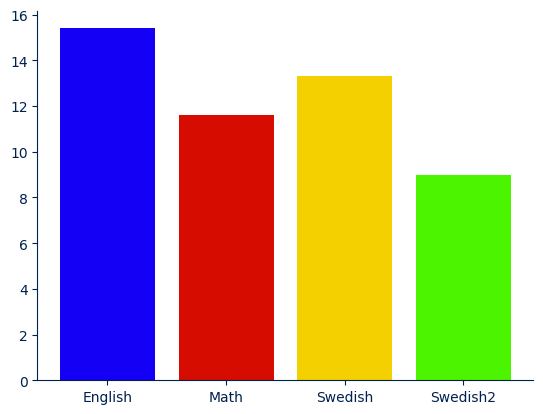

In [7]:
subject_score = {
    "English": df_country_english.loc[1, "Totalt(Poäng)"],
    "Math": df_country_math.loc[1, "Totalt(Poäng)"],
    "Swedish": df_country_swedish.loc[1, "Totalt(Poäng)"],
    "Swedish2": df_country_swedish2.loc[1, "Totalt(Poäng)"]
}
colors= {
    "RED1": "#D60C00",
    "YELLOW1": "#F4D000",
    "BLUE1": "#1400F4",
    "BLUE2": "#00204E",
    "GREEN1": "#4DF400"
}
bar_colors= [
    colors["BLUE1"],
    colors["RED1"],
    colors["YELLOW1"],
    colors["GREEN1"]
]

subjects = list(subject_score.keys())
scores = list(subject_score.values())

############################################
fig, ax_subjects= plt.subplots()
ax_subjects.bar(subjects, scores, color= bar_colors)

ax_subjects.spines["top"].set_visible(False)
ax_subjects.spines["right"].set_visible(False)
ax_subjects.spines["bottom"].set_color(colors["BLUE2"])
ax_subjects.spines["left"].set_color(colors["BLUE2"])
ax_subjects.tick_params(colors= colors["BLUE2"])

## D)

In [8]:
df_country_swedish2

,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12.0,10.4
3,Riket,Skolverket,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
fig, ax= plt.subplots(2, 2, figsize= 6)

ax= df_country_english.plot(kind= "bar", x= "Huvudman", y= "Totalt(Poäng)")
ax= df_country_math.plot(kind= "bar", x= "Huvudman", y= "Totalt(Poäng)")
ax= df_country_swedish.plot(kind= "bar", x= "Huvudman", y= "Totalt(Poäng)")
ax= df_country_swedish2.plot(kind= "bar", x= "Huvudman", y= "Totalt(Poäng)")     #vad vill chun ha för lösning på ".." vilken metod

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

TypeError: Value after * must be an iterable, not int